# El conjunto de datos de la flor Iris

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Basado en el modelo análisis discriminante de Fisher, este conjunto de datos se convirtió en un caso de prueba típico por muchas técnicas de clasificacion estadístico en aprendizaje automático como en máquinas de vectores de soporte.

## Iris Setosa

![Iris-Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)

## Iris Versicolor

![Iris-Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg)

## Iris Virginica

![Iris-Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

## Importar librerias Python

In [1]:
# Librerias numericas
import numpy as np
import pandas as pd

# Librerias de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,14))
sns.set_palette('husl')
sns.set_style("whitegrid")

# Magic command para incluir graficas en el notebook
%matplotlib inline

Usamos la funcion de pandas para leer el archivo CSV con los datos

In [2]:
df=pd.read_csv("data.csv")

info() nos muestra las caracteristicas del DataFrame que se creo al leer los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Informacion sobre el set de datos

* Tenemos 150 observaciones con 4 caracteristicas cada una (longitud de sepalo, ancho de sepalo, longitud de petalo, ancho de petalo

* No hay valores nulos

* Tenemos 50 observaciones de cada especie de Iris (setosa, versicolor, virginica)

## Eliminamos la columna indice

La columna de indice no nos proporciona informacion relevante para el analisis, vamos a excluirla creando un nuevo dataframe sin esa columna.

In [4]:
data = df.drop('Id', axis=1)

## Renombramos nuestras columnas para un mejor entendimiento

Cambiamos el nombre original de las columnas a español para proposito de un mejor entendimiento

In [5]:
data.columns = ['LongitudSepalo', 'AnchoSepalo', 'LongitudPetalo', 'AnchoPetalo', 'Especies']

In [6]:
data.tail()

,LongitudSepalo,AnchoSepalo,LongitudPetalo,AnchoPetalo,Especies
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


describe() nos mouestra la informacion estadistica del dataframe

In [7]:
data.describe()

,LongitudSepalo,AnchoSepalo,LongitudPetalo,AnchoPetalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Count: numero de observaciones en el set de datos
* Mean: valor promedio de las observaciones
* std: desviacion estandar
* min: valor minimo en la columna
* 25% 50% 75%: percentiles
* max: valor maximo en la columna

In [8]:
data['Especies'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Especies, dtype: int64

In [9]:
data.shape

(150, 5)

## Visualizacion de los datos

Usamos seaborn para visualizar la distribucion de las caracteristicas en una rejilla de ejes, las graficas diagonales nos muestran la distribución de probabilidad de una sola variable, el triangulo superior e inferior mustran un diagrama de dispercion entre las caracteristicas.

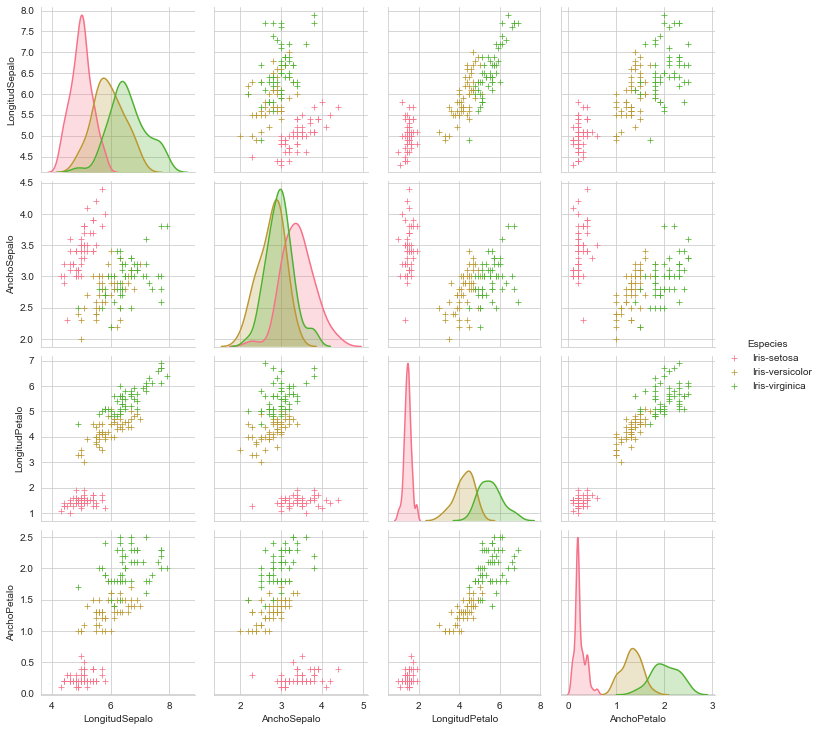

In [10]:
sns.pairplot(data, hue='Especies', markers='+')
plt.show()

Aqui podemos ver los siguientes dos puntos:

* La especie setosa (rosa) se separa mas en ralacion a las especies versicolor y virginica

* Existe cierta superposición en las relaciones por pares de las otras dos especies, versicolor (amarillo) y virginica (verde)

## Estudiando las distribuciones

In [11]:
setosa = data.loc[data["Especies"]=="Iris-setosa"]
virginica = data.loc[data["Especies"]=="Iris-virginica"]
versicolor = data.loc[data["Especies"]=="Iris-versicolor"]


## Visualizacion en 1-D

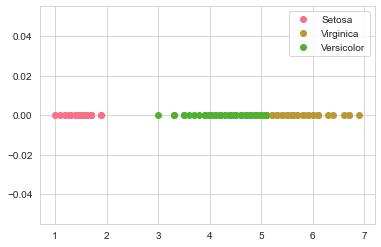

In [12]:
plt.plot(setosa["LongitudPetalo"],np.zeros_like(setosa["LongitudPetalo"]),'o',label="Setosa")
plt.plot(virginica["LongitudPetalo"],np.zeros_like(virginica["LongitudPetalo"]),'o',label="Virginica")
plt.plot(versicolor["LongitudPetalo"],np.zeros_like(versicolor["LongitudPetalo"]),'o',label="Versicolor")
plt.legend()


## Visualizacion en 2-D

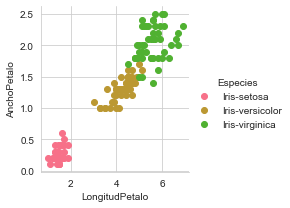

In [13]:
sns.FacetGrid(data, hue='Especies').map(plt.scatter,'LongitudPetalo', 'AnchoPetalo').add_legend()

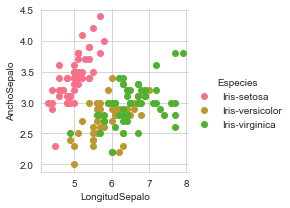

In [14]:
sns.FacetGrid(data, hue='Especies').map(plt.scatter,'LongitudSepalo','AnchoSepalo').add_legend()

De estas dos graficas Podemos conlcuir la diferencia entre las caracteristicas de las tres tipos de flor

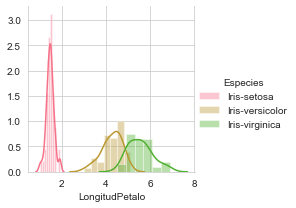

In [15]:
sns.FacetGrid(data, hue='Especies').map(sns.distplot,'LongitudPetalo').add_legend()

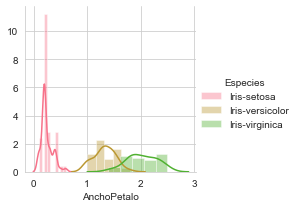

In [16]:
sns.FacetGrid(data, hue='Especies').map(sns.distplot,'AnchoPetalo').add_legend()

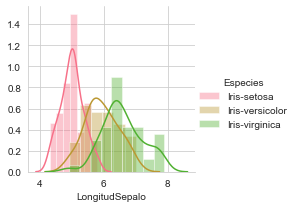

In [17]:
sns.FacetGrid(data, hue='Especies').map(sns.distplot,'LongitudSepalo').add_legend()

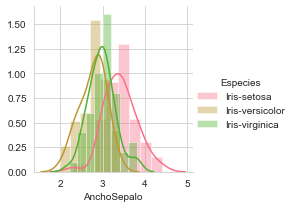

In [18]:
sns.FacetGrid(data, hue='Especies').map(sns.distplot,'AnchoSepalo').add_legend()

Gracias a las graficas anteriores podemos ver la superposicion en la distribucion de las especies versicolor y virginica y la separacion de la especie setosa

## Violin Plot

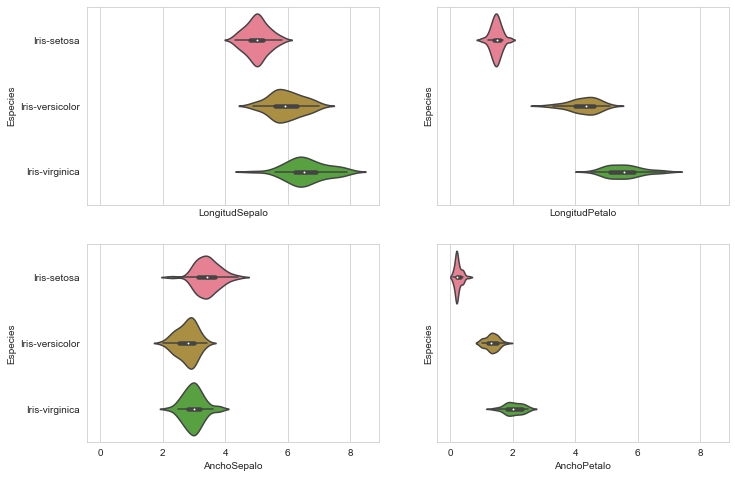

In [19]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(11.5,8))

sns.violinplot(x='LongitudSepalo', y='Especies', data=data, ax=axes[0,0])
sns.violinplot(x='LongitudPetalo', y='Especies', data=data, ax=axes[0,1])
sns.violinplot(x='AnchoSepalo', y='Especies', data=data, ax=axes[1,0])
sns.violinplot(x='AnchoPetalo', y='Especies', data=data, ax=axes[1,1])

## Modelando con scikit-learn

In [20]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop(['Especies'], axis=1)
y = data['Especies']

In [22]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Entrenamiento y pruebas en el mismo set de datos

* Este motod no es sugerido ya que el objetivo es predecir las especies usando datos que el modelo no ha visto antes

* Este es un set de datos pequeño y existe el riesgo de tener sobreajuste al entrenar los datos, estos metodos son solo con propositos educativos

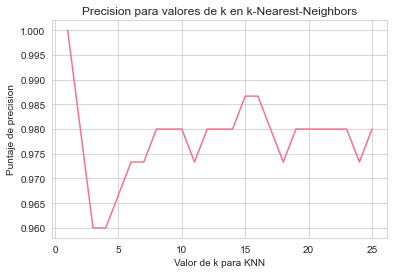

In [23]:
k_range = list(range(1, 26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Puntaje de precision')
plt.title('Precision para valores de k en k-Nearest-Neighbors')
plt.show()

In [24]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


## Separar el dataset en sets de entrenamiento y prueba

* Separando el set de forma aleatorio en dos sets separados, podemois entrenar usando uno de ello y probar usando otro diferente

* No se usan las mismas observaciones en ambos sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


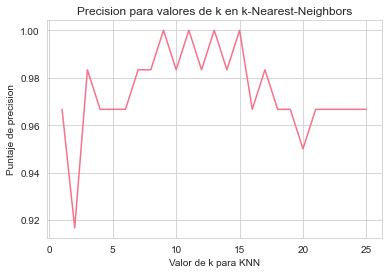

In [27]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Puntaje de precision')
plt.title('Precision para valores de k en k-Nearest-Neighbors')
plt.show()

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [29]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

In [30]:
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

### Referencias:

* http://archive.ics.uci.edu/ml/datasets/Iris
* https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris
* https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset

### Contribuidores:


* https://github.com/arushikhokhar
* https://github.com/JoelBuenrostro